# 西瓜书决策树代码笔记

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor # 回归树
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from matplotlib import rcParams

In [4]:
iris = load_iris()

In [5]:
X = iris.data
y = iris.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
clf = DecisionTreeRegressor() # 创建决策树模型

In [ ]:
clf.fit(X_train, y_train) # 训练模型

DecisionTreeRegressor()

In [ ]:
predictions = clf.predict(X_test) # 预测

In [10]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: ", accuracy)

Accuracy:  1.0


In [13]:
train_pred = clf.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, train_pred))

Train Accuracy: 1.0


In [14]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
print("CV Scores:", scores.mean())

CV Scores: 0.51


[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= 0.8\nsquared_error = 0.658\nsamples = 120\nvalue = 0.992'),
 Text(0.23076923076923078, 0.7857142857142857, 'squared_error = 0.0\nsamples = 40\nvalue = 0.0'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\nsquared_error = 0.25\nsamples = 80\nvalue = 1.488'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\nsquared_error = 0.026\nsamples = 37\nvalue = 1.027'),
 Text(0.07692307692307693, 0.5, 'squared_error = 0.0\nsamples = 36\nvalue = 1.0'),
 Text(0.23076923076923078, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 2.0'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\nsquared_error = 0.103\nsamples = 43\nvalue = 1.884'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\nsquared_error = 0.25\nsamples = 8\nvalue = 1.5'),
 Text(0.3076923076923077, 0.35714285714285715, 'squared_error =

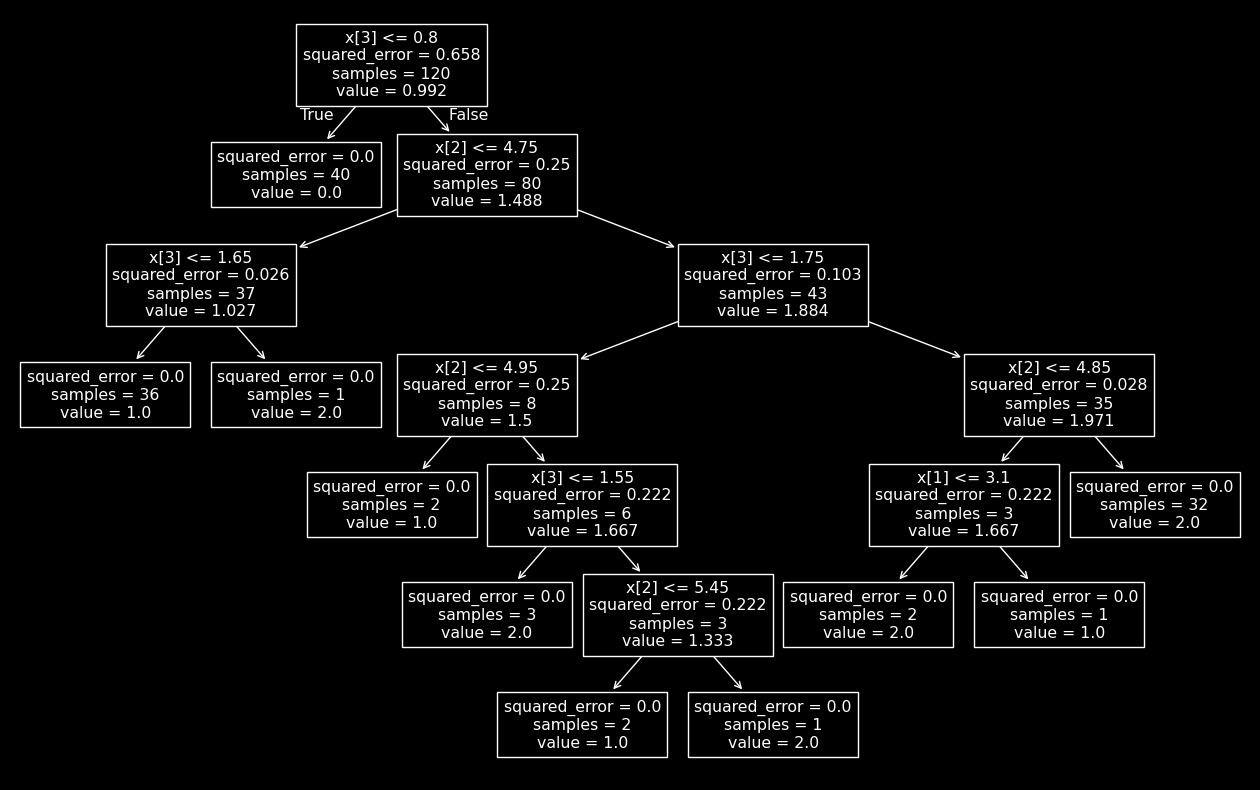

In [12]:
# 画出决策树
rcParams['figure.figsize'] = 16, 10  # 设置为16宽, 10高的图像大小
plot_tree(clf)

In [15]:
# 导入所需库和模块
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [16]:
# 加载数据集
iris = load_iris()
X = iris.data
y = iris.target

In [17]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# 创建决策树模型
dt = DecisionTreeClassifier()

In [19]:
# 设置参数网格
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

参数优化
GridSearchCV

estimator 选择使用的分类器，也就是需要优化参数的模型
param_grid 需要最优化的参数的取值，值为字典或者列表
scoring=None
模型评价标准，默认None,这时需要使用score函数；或者如scoring='roc_auc'，
n_jobs=1 n_jobs: 并行数，int：个数,-1：跟CPU核数一致, 1:默认值
cv 交叉验证参数，默认None，使用三折交叉验证。指定fold数量，默认为3，也可以是yield产生训练/测试数据的生成器。
verbose 日志冗长度，int：冗长度，0：不输出训练过程，1：偶尔输出，>1：对每个子模型都输出。
进行预测的常用方法和属性

grid.fit()：运行网格搜索

grid_scores_：给出不同参数情况下的评价结果

best_params_：描述了已取得最佳结果的参数的组合

best_score_：成员提供优化过程期间观察到的最好的评分

In [20]:
# 使用网格搜索进行参数优化
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
# 输出最佳参数
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [ ]:
# 使用最佳参数训练模型
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=10)


DecisionTreeClassifier(min_samples_split=10)

In [23]:
# 预测测试集并计算准确率
y_pred = best_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set: {:.2f}".format(accuracy))

Accuracy on test set: 1.00


[Text(0.4444444444444444, 0.9, 'x[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.38888888888888884, 0.8, 'True  '),
 Text(0.5555555555555556, 0.7, 'x[3] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.5, 0.8, '  False'),
 Text(0.3333333333333333, 0.5, 'x[2] <= 4.95\ngini = 0.214\nsamples = 41\nvalue = [0, 36, 5]'),
 Text(0.2222222222222222, 0.3, 'x[3] <= 1.6\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.7777777777777778, 0.5, 'x[2] <= 4.85\ngini = 0.059\nsamples = 33\nvalue = [0, 1, 32]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.8888888888888888, 0.3, 'gini = 0.0\nsample

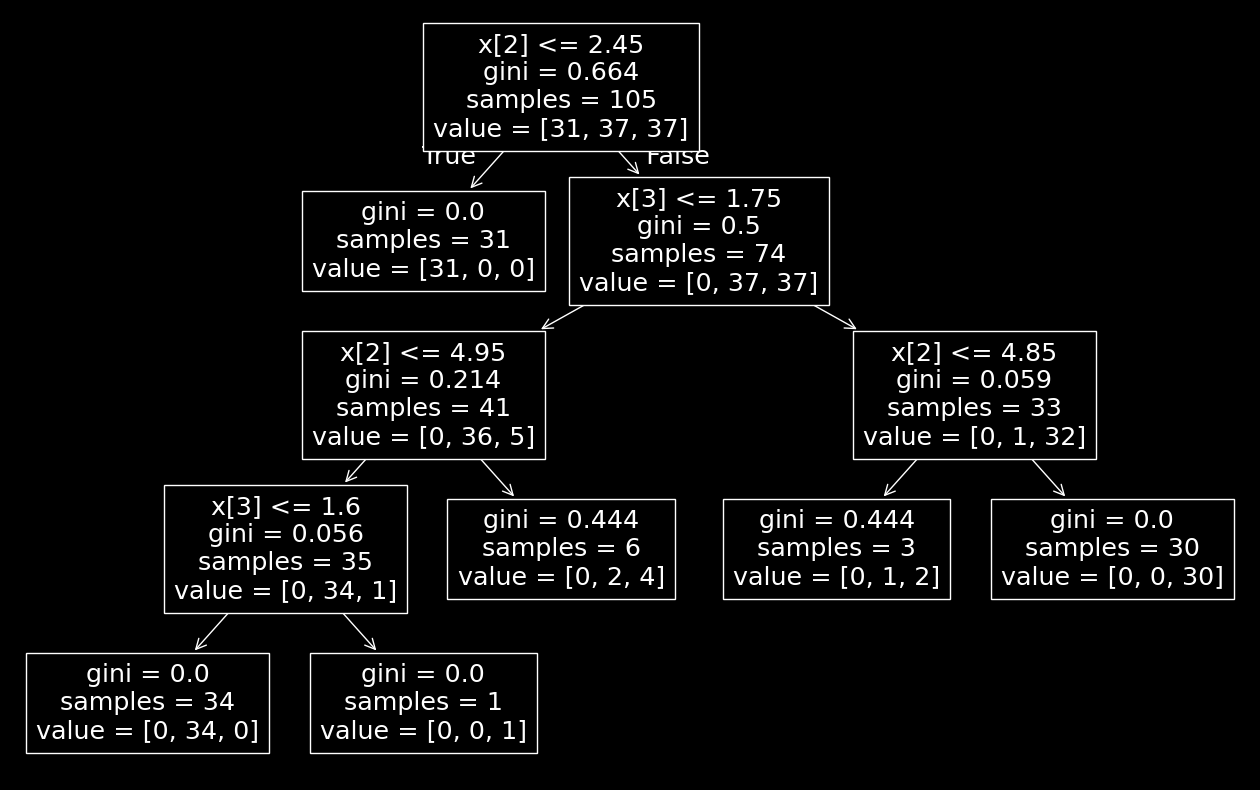

In [24]:
# 画出决策树
rcParams['figure.figsize'] = 16, 10  # 设置为16宽, 10高的图像大小
plot_tree(best_dt)